In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\15510\AppData\Local\Temp\ipykernel_20948\1968691199.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


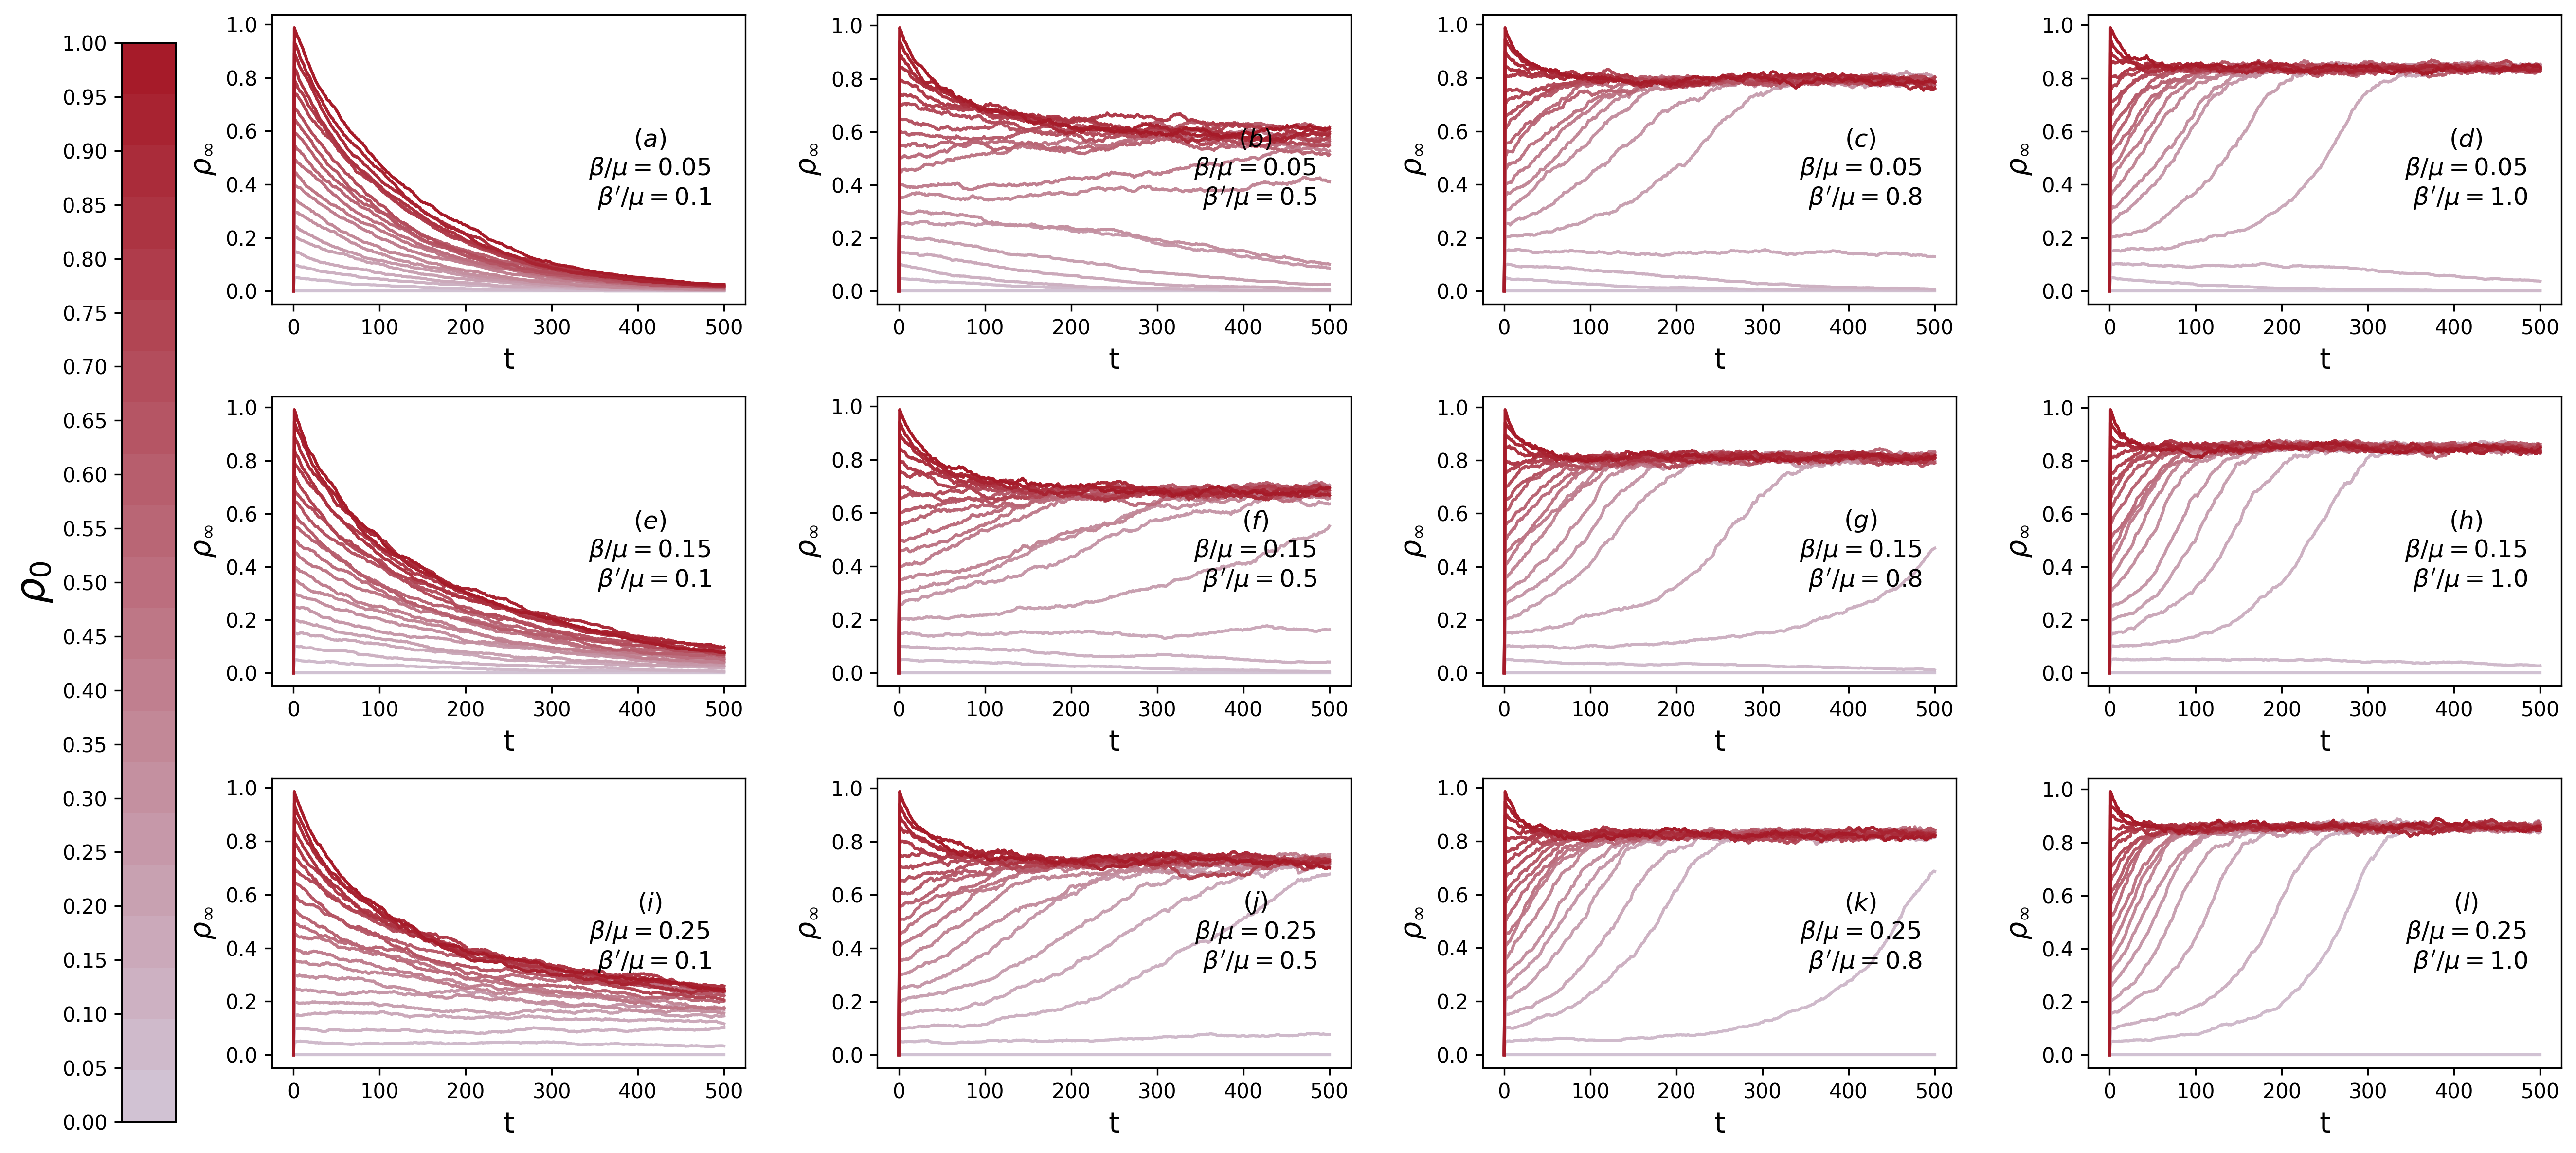

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import os
import pandas as pd

directory = '../simulation_result/plague/'  # 指定CSV文件所在的目录
file_list = os.listdir(directory)

names = locals()  # 获取本地命名空间
parameters = [(beta,beta_h) for beta in [0.05,0.15,0.25] for beta_h in [0.1,0.5,0.8,1.0]]
seedsmap = np.linspace(0, 1, 21)
colo = ['t','I','S']

for sign in range(len(parameters)):
    for seed in seedsmap:
        seed = int(seed*100)
        filename = f'Fig03_{sign}_{seed}.csv'
        var_name = 'df_' + str(sign) + '_' + str(seed) 
        names[var_name] = pd.read_csv(os.path.join(directory, filename),names = colo).drop(['t','S'],axis=1)

# 创建子图
fig, axes = plt.subplots(3,4, figsize=(16, 8),dpi= 300)

# 构建自定义颜色映射
seed_min = min(seedsmap)
seed_max = max(seedsmap)
colors = ['#d1c2d3', '#a61b29']
cmap = LinearSegmentedColormap.from_list('custom', colors,N = 21)
title_map = 'abcdefghijklmn'
# 循环绘制每个子图
for sign, [beta, beta_h] in enumerate(parameters):
    row = sign // 4
    col = sign % 4
    ax = axes[row,col]

    # 绘制同一sign的不同seed的数据
    for idx, seed in enumerate(sorted(seedsmap)):
        seed_int = int(seed * 100)
        var_name = 'df_' + str(sign) + '_' + str(seed_int)
        df = locals()[var_name]
        color = cmap((seed - seed_min) / (seed_max - seed_min))  # 根据seed选择颜色
        ax.plot(df['I'], color=color)

    ax.set_title(f'$({title_map[sign]})$ \n$\\beta/\\mu={(beta)}$ \n $\\beta\' /\\mu = {beta_h}$',
                 x=0.8, y=0.3, horizontalalignment='center')
    ax.set_xlabel('t',fontsize = 14)
    ax.set_ylabel('$\\rho_\infty$',fontsize = 14)

# 创建色板(colorbar)
plt.subplots_adjust(left=-0.12)
# cax = plt.axes((0.85, 0.1, 0.075, 0.8))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=seed_min, vmax=seed_max))
# sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', shrink= 1.2,
                    location='left',ticks =seedsmap,anchor = (0.5,0.5))  # 将colorbar放在最右侧，pad调整位置
cbar.set_label('$\\rho_0$',fontsize = 20)
# cbar.ax.set_xticklabels([f'{seed:.2f}' for seed in sorted(seedsmap)])  # 标记每个seed对应的颜色坐标

plt.tight_layout()
# plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig03_evo.eps',format='eps',bbox_inches = 'tight')
plt.show()


C:\Users\15510\AppData\Local\Temp\ipykernel_14828\1442269585.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


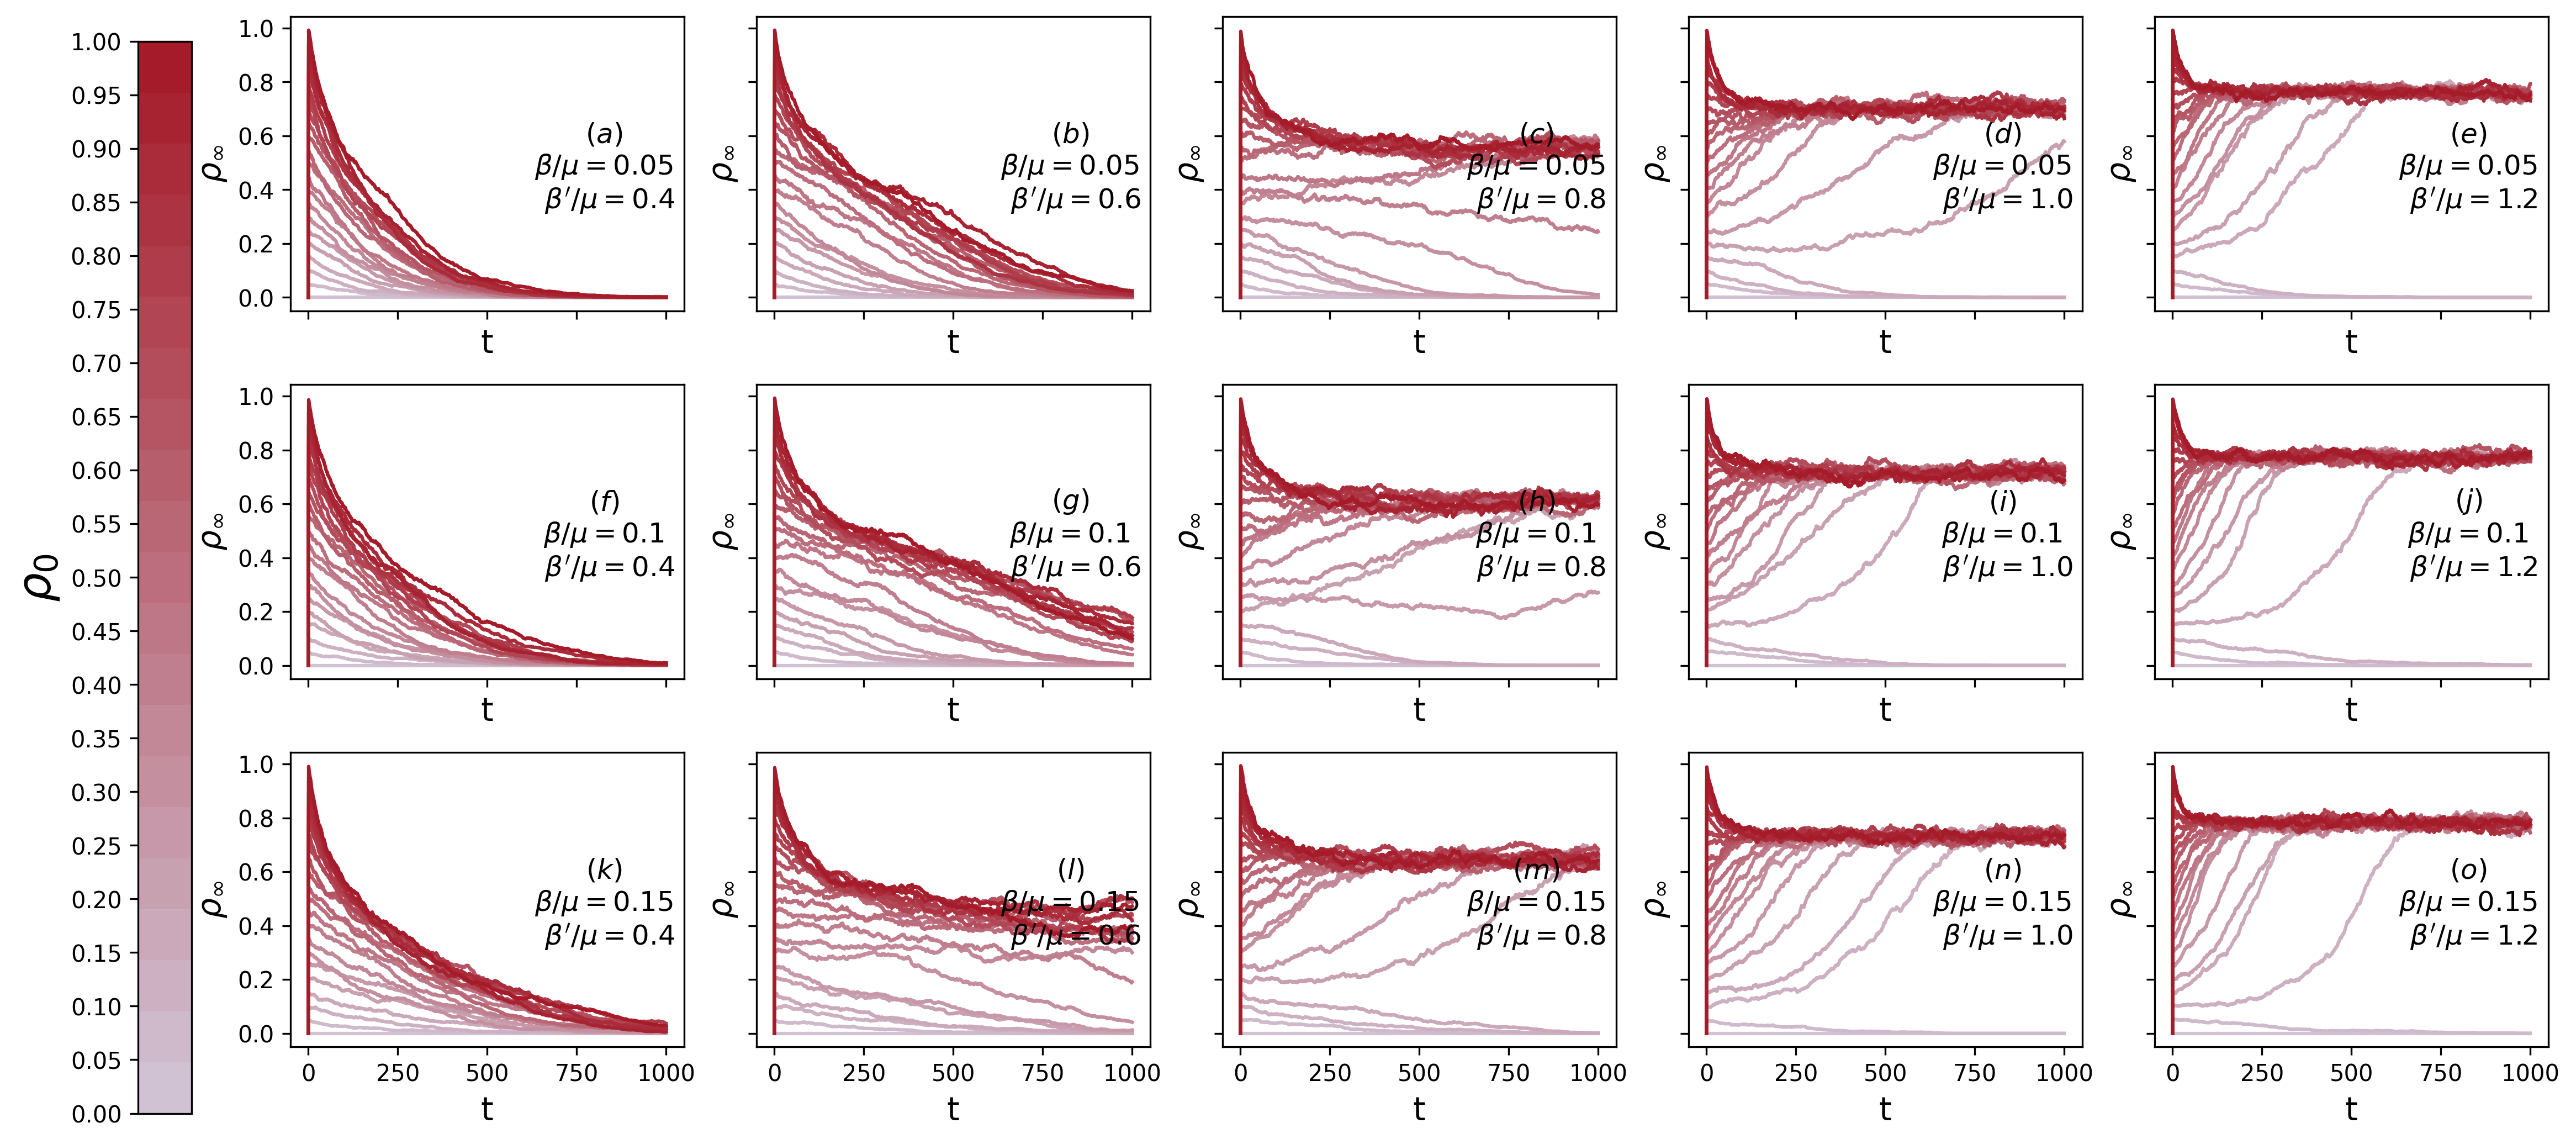

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import os
import pandas as pd

directory = '../simulation_result/plague1600/'  # 指定CSV文件所在的目录
file_list = os.listdir(directory)

names = locals()  # 获取本地命名空间
parameters = [(beta, beta_h) for beta in [0.05, 0.1, 0.15] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2]]

seedsmap = np.linspace(0, 1, 21)
colo = ['t','I','S']

for sign in range(len(parameters)):
    for seed in seedsmap:
        seed = int(seed*100)
        filename = f'Fig031600_{sign}_{seed}.csv'
        var_name = 'df_' + str(sign) + '_' + str(seed) 
        names[var_name] = pd.read_csv(os.path.join(directory, filename),names = colo).drop(['t','S'],axis=1)

# 创建子图
fig, axes = plt.subplots(3,5, figsize=(14, 7),dpi= 300,sharex=True,sharey=True)
plt.subplots_adjust(wspace=-0.1,hspace=-0.1)

# 构建自定义颜色映射
seed_min = min(seedsmap)
seed_max = max(seedsmap)
colors = ['#d1c2d3', '#a61b29']
cmap = LinearSegmentedColormap.from_list('custom', colors,N = 21)
title_map = 'abcdefghijklmnopq'
# 循环绘制每个子图
for sign, [beta, beta_h] in enumerate(parameters):
    row = sign // 5
    col = sign % 5
    ax = axes[row,col]

    # 绘制同一sign的不同seed的数据
    for idx, seed in enumerate(sorted(seedsmap)):
        seed_int = int(seed * 100)
        var_name = 'df_' + str(sign) + '_' + str(seed_int)
        df = locals()[var_name]
        color = cmap((seed - seed_min) / (seed_max - seed_min))  # 根据seed选择颜色
        ax.plot(df['I'], color=color)

    ax.set_title(f'$({title_map[sign]})$ \n$\\beta/\\mu={(beta)}$ \n $\\beta\' /\\mu = {beta_h}$',
                 x=0.8, y=0.3, horizontalalignment='center')
    ax.set_xlabel('t',fontsize = 14)
    ax.set_ylabel('$\\rho_\infty$',fontsize = 14)

# 创建色板(colorbar)
plt.subplots_adjust(left=-0.12)
# cax = plt.axes((0.85, 0.1, 0.075, 0.8))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=seed_min, vmax=seed_max))
# sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', shrink= 1.2,
                    location='left',ticks =seedsmap,anchor = (0.5,0.5))  # 将colorbar放在最右侧，pad调整位置
cbar.set_label('$\\rho_0$',fontsize = 20)
# cbar.ax.set_xticklabels([f'{seed:.2f}' for seed in sorted(seedsmap)])  # 标记每个seed对应的颜色坐标

plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig03_evo.eps',format='eps',bbox_inches = 'tight')
plt.show()


C:\Users\15510\AppData\Local\Temp\ipykernel_2592\2235435071.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


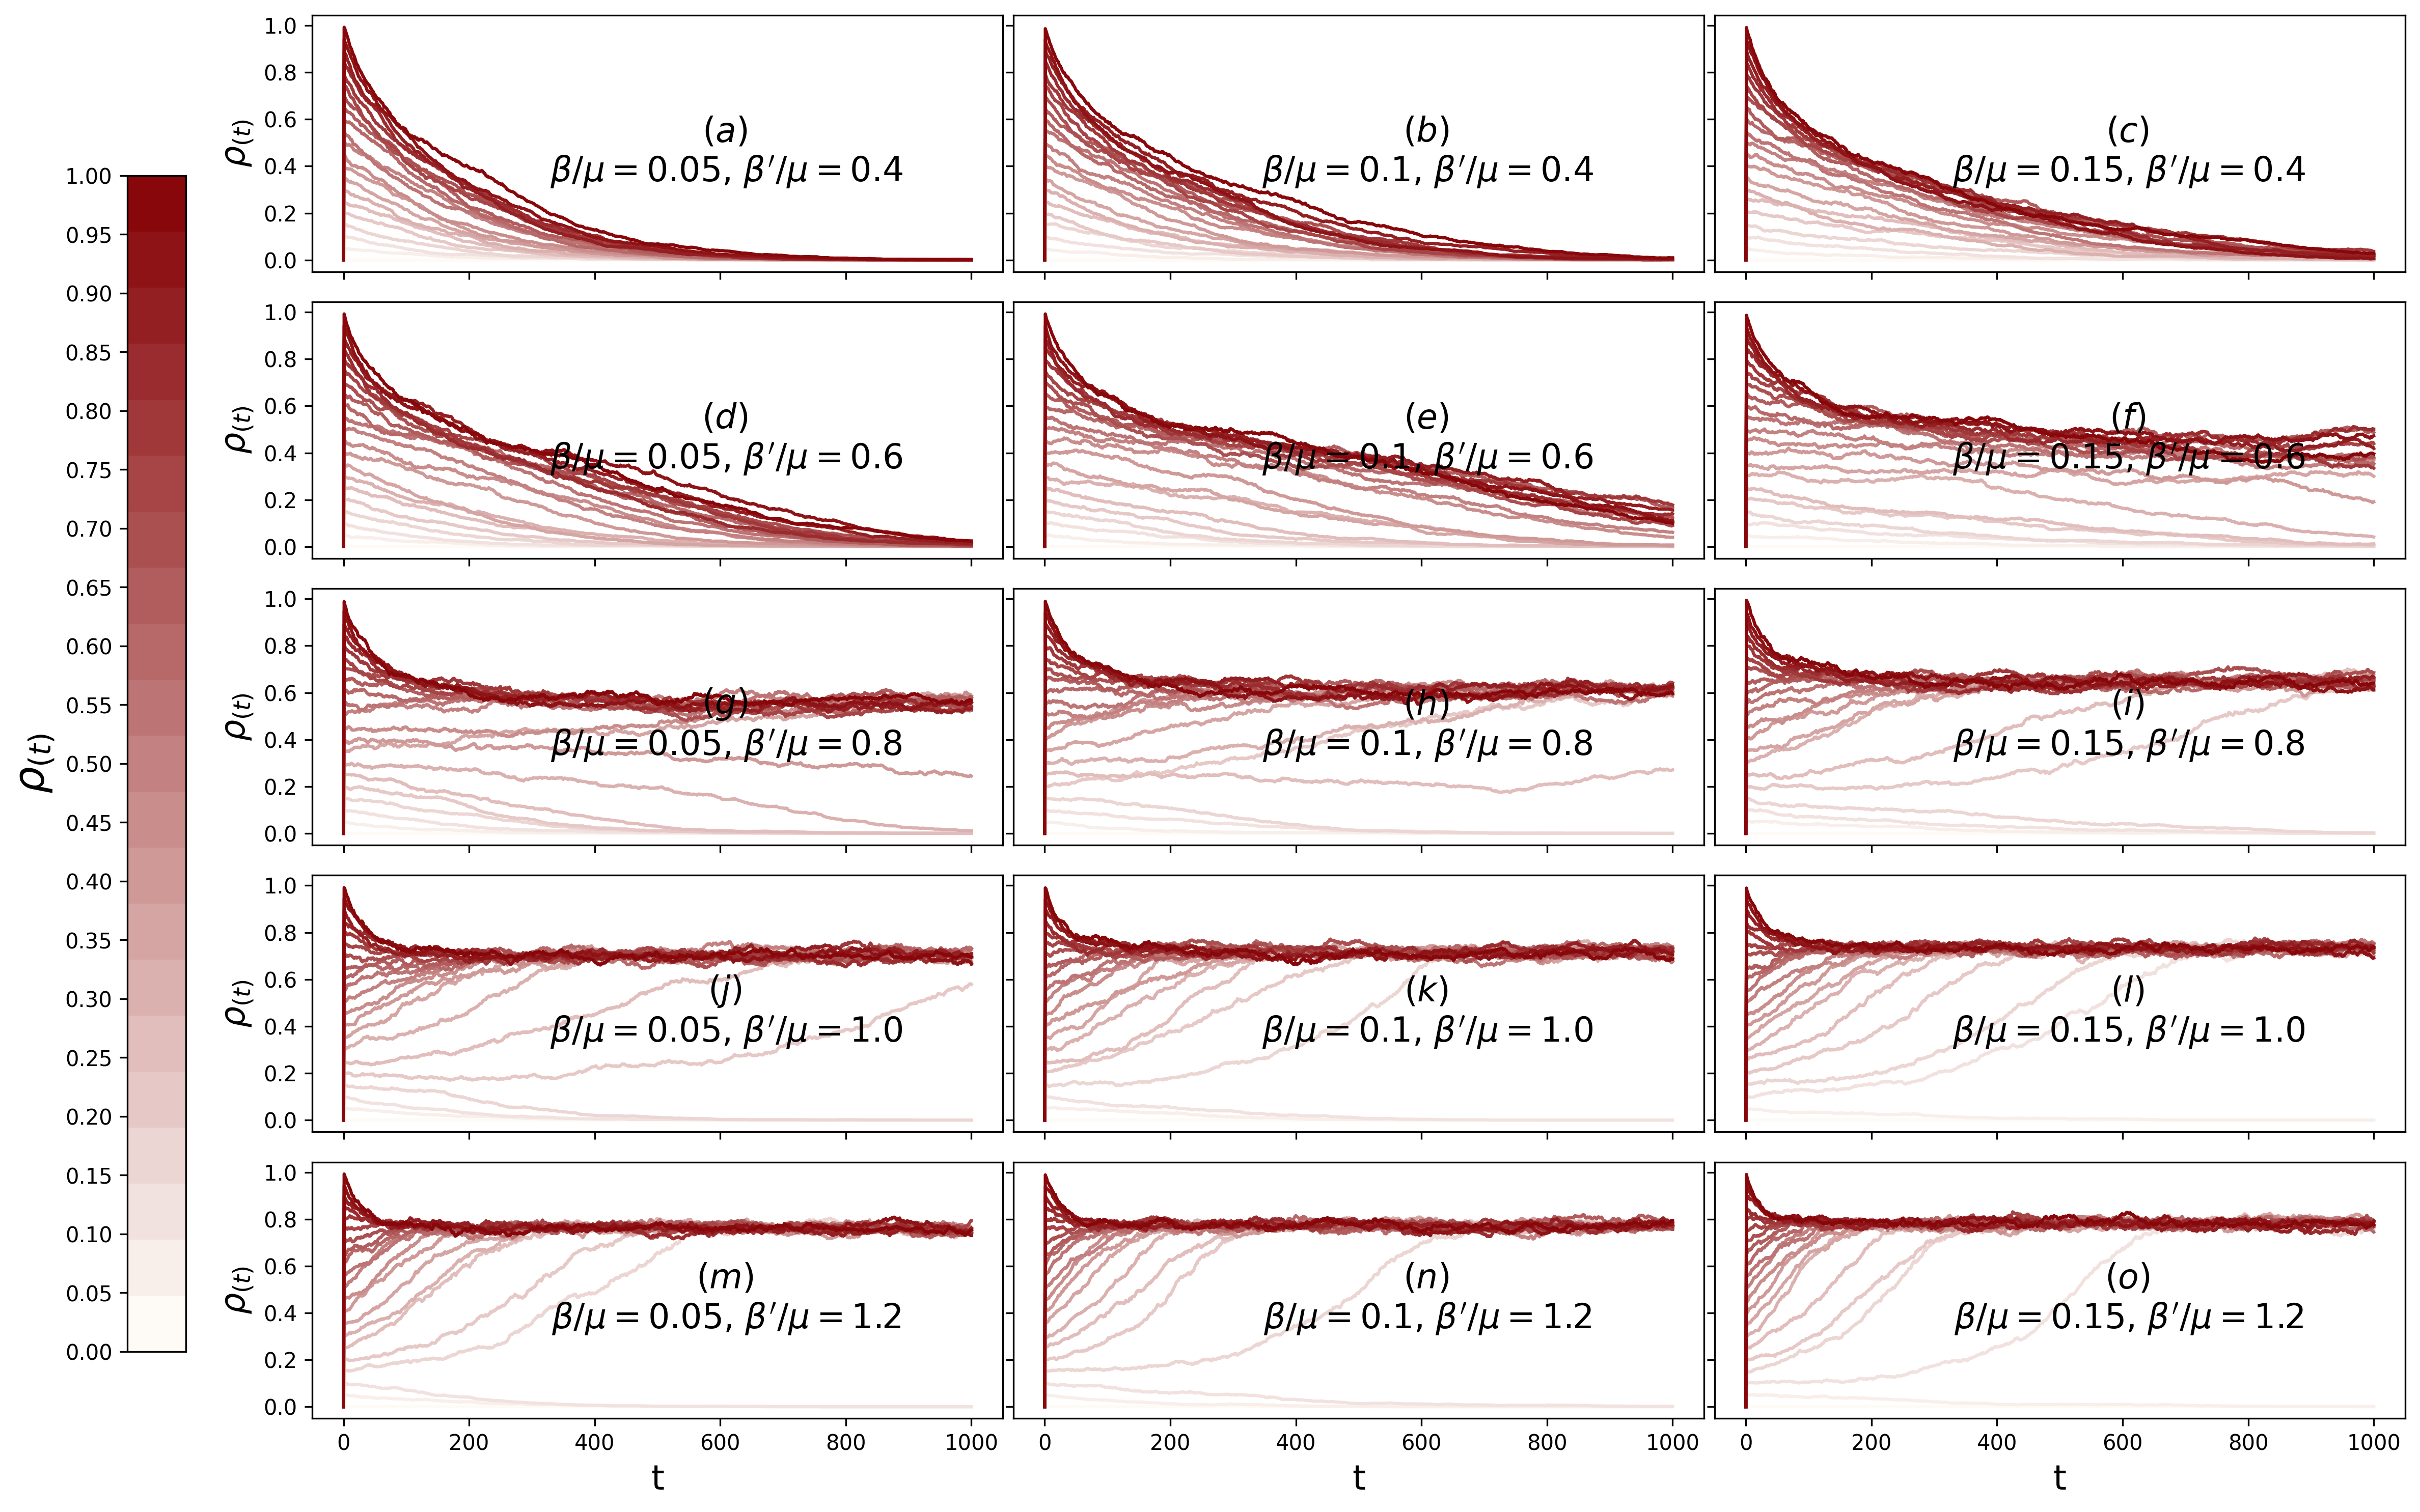

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import os
import pandas as pd

directory = '../simulation_result/plague1600/'  # 指定CSV文件所在的目录
file_list = os.listdir(directory)

names = locals()  # 获取本地命名空间
parameters = [(beta, beta_h) for beta in [0.05, 0.1, 0.15] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2]]

seedsmap = np.linspace(0, 1, 21)
colo = ['t','I','S']

for sign in range(len(parameters)):
    for seed in seedsmap:
        seed = int(seed*100)
        filename = f'Fig031600_{sign}_{seed}.csv'
        var_name = 'df_' + str(sign) + '_' + str(seed) 
        names[var_name] = pd.read_csv(os.path.join(directory, filename),names = colo).drop(['t','S'],axis=1)

# 创建子图
fig, axes = plt.subplots(5, 3, figsize=(14, 10), dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)

# 构建自定义颜色映射
seed_min = min(seedsmap)
seed_max = max(seedsmap)
colors = ['#FEFAF6', '#88070B']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=21)
title_map = 'abcdefghijklmnopq'

i = 0
# 循环绘制每个子图
for beta_h_idx, beta_h in enumerate([0.4, 0.6, 0.8, 1.0, 1.2]):
    for beta_idx, beta in enumerate([0.05, 0.1, 0.15]):
        sign = beta_idx * 5 + beta_h_idx
        ax = axes[beta_h_idx, beta_idx]
        
        # 绘制同一 sign 的不同 seed 的数据
        for idx, seed in enumerate(sorted(seedsmap)):
            seed_int = int(seed * 100)
            var_name = 'df_' + str(sign) + '_' + str(seed_int)
            df = locals()[var_name]
            color = cmap((seed - seed_min) / (seed_max - seed_min))  # 根据 seed 选择颜色
            ax.plot(df['I'], color=color)

        ax.set_title(f'$({title_map[i]})$ \n$\\beta/\mu={(beta)}$, $\\beta\'/\mu = {beta_h}$',
                     x=0.6, y=0.3, horizontalalignment='center', fontsize=16)
        if beta_h_idx == 4:
            ax.set_xlabel('t', fontsize=16)
        if beta_idx == 0 :
            ax.set_ylabel('$\\rho_{(t)}$', fontsize=16)
        i +=1

# 创建色板(colorbar)
plt.subplots_adjust(left=-0.14)
# cax = plt.axes((0.85, 0.1, 0.075, 0.8))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=seed_min, vmax=seed_max))
# sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', shrink= 1,
                    location='left',ticks =seedsmap,anchor = (0.5,0.5))  # 将colorbar放在最右侧，pad调整位置
cbar.set_label('$\\rho_{(t)}$', fontsize=20)
cbar.ax.set_yticklabels([f'{seed:.2f}' for seed in sorted(seedsmap)])  # 标记每个 seed 对应的颜色坐标

plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig03_evo.pdf', format='pdf', bbox_inches='tight')
plt.show()


C:\Users\15510\AppData\Local\Temp\ipykernel_20520\4284736566.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


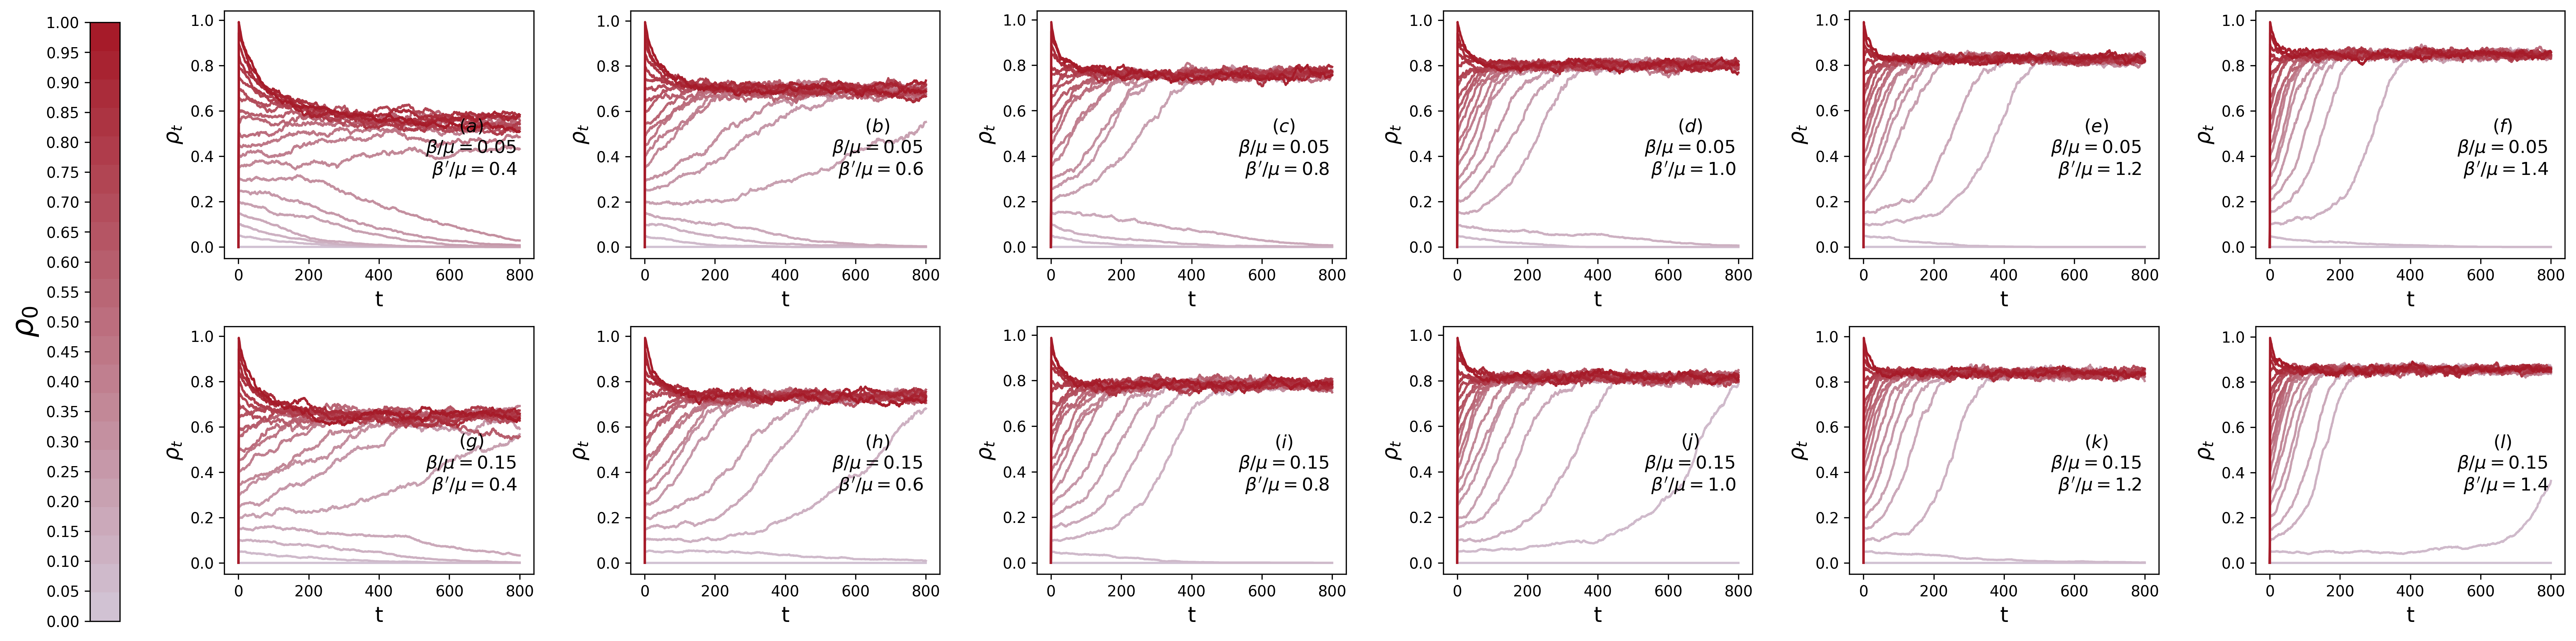

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import os
import pandas as pd

directory = '../simulation_result/plague1602/'  # 指定CSV文件所在的目录
file_list = os.listdir(directory)

names = locals()  # 获取本地命名空间
parameters = [(beta, beta_h) for beta in [0.05, 0.15] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2, 1.4]]
seedsmap = np.linspace(0, 1, 21)
colo = ['t','I','S']

for sign in range(len(parameters)):
    for seed in seedsmap:
        seed = int(seed*100)
        filename = f'Fig031600_{sign}_{seed}.csv'
        var_name = 'df_' + str(sign) + '_' + str(seed) 
        names[var_name] = pd.read_csv(os.path.join(directory, filename),names = colo).drop(['t','S'],axis=1)

# 创建子图
fig, axes = plt.subplots(2,6, figsize=(22, 6),dpi= 300)

# 构建自定义颜色映射
seed_min = min(seedsmap)
seed_max = max(seedsmap)
colors = ['#d1c2d3', '#a61b29']
cmap = LinearSegmentedColormap.from_list('custom', colors,N = 21)
title_map = 'abcdefghijklmn'
# 循环绘制每个子图
for sign, [beta, beta_h] in enumerate(parameters):
    row = sign // 6
    col = sign % 6
    ax = axes[row,col]

    # 绘制同一sign的不同seed的数据
    for idx, seed in enumerate(sorted(seedsmap)):
        seed_int = int(seed * 100)
        var_name = 'df_' + str(sign) + '_' + str(seed_int)
        df = locals()[var_name]
        color = cmap((seed - seed_min) / (seed_max - seed_min))  # 根据seed选择颜色
        ax.plot(df['I'], color=color)

    ax.set_title(f'$({title_map[sign]})$ \n$\\beta/\\mu={(beta)}$ \n $\\beta\' /\\mu = {beta_h}$',
                 x=0.8, y=0.3, horizontalalignment='center')
    ax.set_xlabel('t',fontsize = 14)
    ax.set_ylabel('$\\rho_t$',fontsize = 14)

# 创建色板(colorbar)
plt.subplots_adjust(left=-0.12)
# cax = plt.axes((0.85, 0.1, 0.075, 0.8))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=seed_min, vmax=seed_max))
# sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', shrink= 1.2,
                    location='left',ticks =seedsmap,anchor = (0.5,0.5))  # 将colorbar放在最右侧，pad调整位置
cbar.set_label('$\\rho_0$',fontsize = 20)
# cbar.ax.set_xticklabels([f'{seed:.2f}' for seed in sorted(seedsmap)])  # 标记每个seed对应的颜色坐标

plt.tight_layout()
# plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig03_evo.eps',format='eps',bbox_inches = 'tight')
plt.show()
